In [15]:
try:
  print("Dependencies are already installed. Skipping...")
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram,plot_bloch_multivector
  from qiskit import Aer,execute
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit_textbook.tools import random_state
  from qiskit.extensions import Initialize
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc qiskit-aer
  ! pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram,plot_bloch_multivector
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit import Aer,execute
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit_textbook.tools import random_state
  from qiskit.extensions import Initialize

Dependencies are already installed. Skipping...


In [2]:
qiskit.__version__

'0.25.1'

In [3]:
!rm -r modules

rm: cannot remove 'modules': No such file or directory


In [4]:
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

In [6]:
backend = Aer.get_backend('statevector_simulator')

# Quantum Teleportation

In [12]:
def quantum_teleportation_iteration():
  # create quantum register
  qr = QuantumRegister(3) # there are two entanngled qubits and alice's personal qubit
  crx,crz = ClassicalRegister(1),ClassicalRegister(1) # initialize the clasical registers for alice to make measurements
  qc =  QuantumCircuit(qr,crz,crx)

  # initialize alice's personal qubit with a random state
  w = random_state(1)
  qc.append(Initialize(w), [0]) # initialize the personal qubit

  qc.barrier()
  qc.h(1)
  qc.cx(1,2)
  qc.barrier()
  qc.cx(0,1)
  qc.h(0)
  qc.measure(range(0,2),range(0,2))

  # alice sends qubit and bit sequences
  qc.barrier()
  qc.x(2).c_if(crx,1)
  qc.z(2).c_if(crz,1)
  return qc,w


  qc.barrier()

In [13]:
qc, w = quantum_teleportation_iteration()

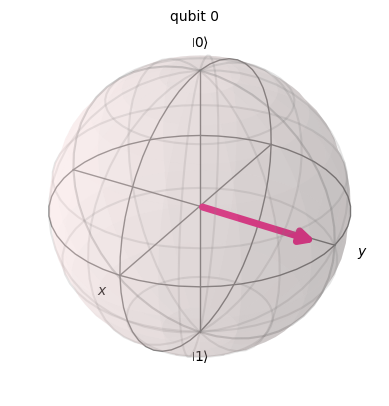

In [16]:
# Visualize the state alice wishes to send
plot_bloch_multivector(w)

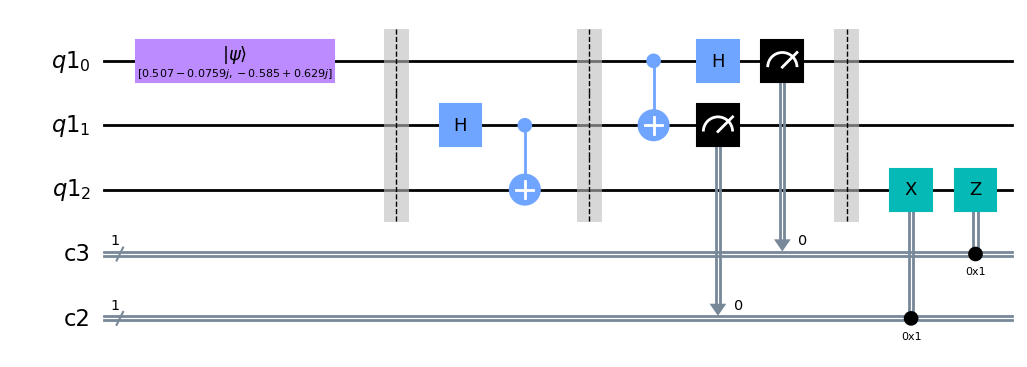

In [17]:
qc.draw("mpl")

Note that the no clong theorem is not violated since the information in the fist qubit has beed destroyed.

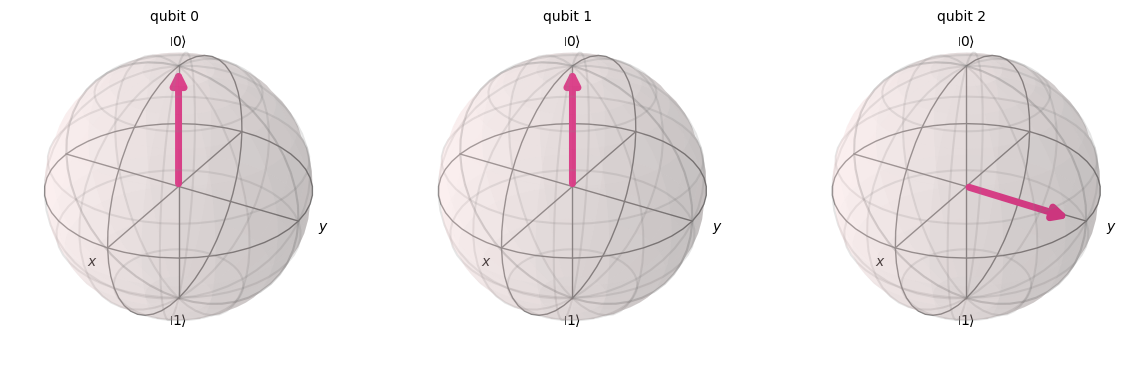

In [22]:
# visualization of the quantum states post quantum teleportation
plot_bloch_multivector(execute(qc, backend).result().get_statevector())